In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [228]:
import numpy as np
import nrrd
import os
import cv2

def nrrd_to_png(nrrd_filename,save_path):
    nrrd_filename = nrrd_filename
    nrrd_data, nrrd_options = nrrd.read(nrrd_filename)
    h,w,slides_num = nrrd_data.shape
    for i in range(slides_num):
        img = nrrd_data[:,:,slides_num-i-1]*2000
        #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        cv2.imwrite(save_path + '/' + '_' + str(i+1) + '.png',img)
        
nrrd_to_png( '/Users/armandayuu/Desktop/adchest/005adpositive/Case-1_original_firstorder_Skewness.nrrd', '/Users/armandayuu/Desktop/adchest/005adpositive')

In [237]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
from PIL import Image
import numpy as np


I = Image.open('/Users/armandayuu/Desktop/005_root.png')
#I.show()
L = I.convert('L')
#L.show()
L.save('/Users/armandayuu/Desktop/gray005_root.png')

# 自定义colormap
def colormap():
    return mpl.colors.LinearSegmentedColormap.from_list('cmap', ['#00f6ff', '#003cff', '#ff3600', '#ff6000', '#ffff00'], 256)

# 读取灰度图
data=mpimg.imread('/Users/armandayuu/Desktop/gray005_root.png')
# 如果需要固定colorbar的范围，可以设置参数vmin，vmax，具体参考
                                  #http://matplotlib.org/api/image_api.html

# 设定每个图的colormap和colorbar所表示范围是一样的，即归一化 
plt.imsave('/Users/armandayuu/Desktop/005_wavelet_root2.png',data,vmin=0.85,vmax=1,cmap='RdYlBu_r')

In [5]:
seed = np.random.seed(42)
data = np.random.randint(-1,10,size=(11,11))

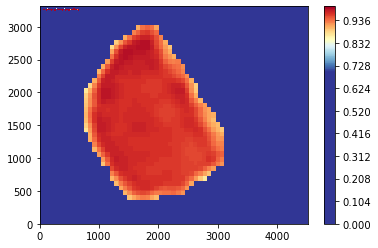

In [12]:
h = plt.contourf(data,256,vmin=0.7,vmax=1,cmap='RdYlBu_r')
cb = plt.colorbar(h)

In [8]:
def colormap():
    # 白青绿黄红
    cdict = ['#00f6ff', '#003cff', '#ff3600', '#ff6000', '#ffff00']
    # 按照上面定义的colordict，将数据分成对应的部分，indexed：代表顺序
    return colors.ListedColormap(cdict, 'indexed')

my_cmap = colormap()

NameError: name 'colors' is not defined

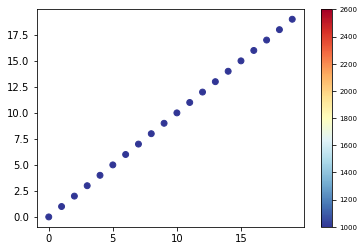

In [9]:
cm = plt.cm.get_cmap('RdYlBu_r')
xy = range(20)
z = xy
sc = plt.scatter(xy, xy, c=z, vmin=1000, vmax=2600, s=35, cmap='RdYlBu_r')
out = plt.colorbar(sc)



out.ax.tick_params(labelsize=7)  #设置色标刻度字体大小。

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 16,
        }
cb.set_label('colorbar',fontdict=font) #设置colorbar的标签字体及其大小


#output = out.get_figure()
plt.savefig('/Users/armandayuu/Desktop/bar-2.png',dpi=800,bbox_inches='tight')
plt.show()

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import svm
from sklearn.datasets import make_blobs
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

import pandas as pd 
from pandas import Series,DataFrame
import seaborn as sns
from scipy import stats

In [221]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "p<0.0001"
    elif pvalue <= 0.001:
        return "p<0.001"
    elif pvalue <= 0.01:
        pvalue=format(pvalue,'.4f')
        return str(pvalue)
    elif pvalue <= 0.05:
        return pvalue
    return "ns"


0.00312111496903595


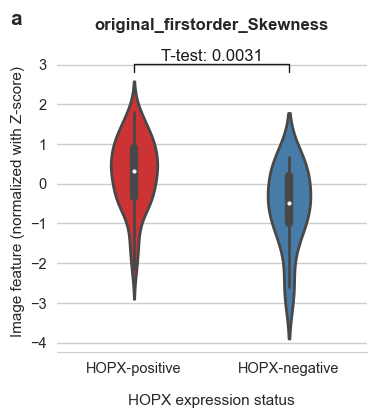

In [227]:
#111-HOPX-8 image features
def expression_type(s):
    it = {b'normal/over':0, b'low':1}
    return it[s]

df = pd.read_csv("/Users/armandayuu/Desktop/train_plot.csv",header=0,index_col=0)


pathtest = "/Users/armandayuu/Desktop/test_plot.csv"

x1,x2,y =df['original_firstorder_Skewness'],df['wavelet-LLL_firstorder_RootMeanSquared'],df['group']

data_p = df[["original_firstorder_Skewness","group"]]
stat,p_value = stats.ttest_ind(data_p[data_p["group"]=="HOPX-negative"]["original_firstorder_Skewness"],
                                     data_p[data_p["group"]=="HOPX-positive"]["original_firstorder_Skewness"],
                                     equal_var=False)
print(p_value)
p_value_cov=convert_pvalue_to_asterisks(p_value)

fig,ax = plt.subplots(figsize=(4,4),dpi=100,facecolor="w")
ax = sns.set(style="whitegrid", palette="Set1", color_codes=True)     #set( )设置主题，调色板更常用  
ax = sns.violinplot(x="group",y="original_firstorder_Skewness",data=df,palette='Set1',width=0.3,inner='box',linewidth=2, )

# 添加P值
x1, x2 = 0, 1
y,h = data_p["original_firstorder_Skewness"].max()+1,.2
#绘制横线位置
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c="k") 
#添加P值
ax.text((x1+x2)*.5, y+h, "T-test: "+ p_value_cov, ha='center', va='bottom', color="k")
ax.tick_params(which='major',direction='in',length=3,width=1.,labelsize=10.5,bottom=False,pad=7)
for spine in ["top","left","right"]:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_linewidth(0.8)
#ax.grid(axis='y',ls='--',c='gray')
ax.set_axisbelow(True)

plt.xlabel('HOPX expression status',labelpad=13,fontsize=11)
plt.ylabel('Image feature (normalized with Z-score)',fontsize=11)
plt.text(-0.8,4,"a",fontweight='bold',fontsize=15)
plt.title('original_firstorder_Skewness',fontweight='bold',fontsize=12,pad=15)

val=0.5
ax.set_xlim(0-val, 1+val)

plt.savefig('/Users/armandayuu/Desktop/original_ske_violin.png',dpi=800,bbox_inches='tight')

#plt.figure(figsize=(6,5))
#colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
#sns.set(style="whitegrid", palette="Set1", color_codes=True)     #set( )设置主题，调色板更常用  
#sns.violinplot(y='original_firstorder_Skewness',x='group',width=0.3,data=df,inner='box',linewidth=3)
#plt.xlabel('HOPX expression status',labelpad=18,fontsize=13)
#plt.ylabel('Image feature (normalized with Z-score)',fontsize=13)
#plt.title('original_firstorder_Skewness',fontweight='bold',fontsize=15,pad=18)

#print stats.ttest_ind(rvs1,rvs2)

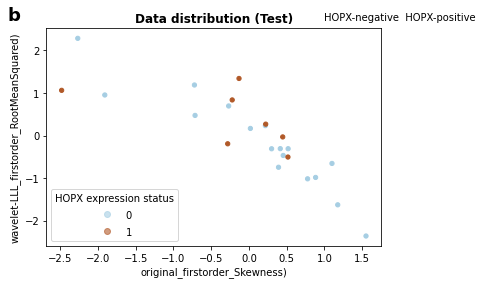

In [35]:
#111-HOPX-8 image features
def expression_type(s):
    it = {b'normal/over':0, b'low':1}
    return it[s]

pathtrain = "/Users/armandayuu/Desktop/train_plot.txt"
datatrain = np.loadtxt(pathtrain, dtype=float, delimiter='\t', converters={2:expression_type})

pathtest = "/Users/armandayuu/Desktop/test_plot.txt"
datatest = np.loadtxt(pathtest, dtype=float, delimiter='\t', converters={2:expression_type})

X, y=np.split(datatest,indices_or_sections=(2,),axis=1) #X为数据，y为标签,axis是分割的方向，1表示横向，0表示纵向，默认为0

scatter=plt.scatter(stats.zscore(X[:, 0]), stats.zscore(X[:, 1]), c=y, s=18, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()   
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
#out = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#                 linestyles=['--', '-', '--'])
# plot support vectors
#out = ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#                 linewidth=1, facecolors='none', edgecolors='k')

out = plt.xlabel('original_firstorder_Skewness)',fontsize=10)
out = plt.ylabel('wavelet-LLL_firstorder_RootMeanSquared)',fontsize=10)


handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="lower left", title="HOPX expression status",fontsize=10)
ax.text(1,2.7,"HOPX-negative  HOPX-positive",fontsize=10)
ax.text(-3.2,2.7,"b",fontweight='bold',fontsize=18)

out = plt.title('Data distribution (Test)',fontweight='bold',fontsize=12)
plt.show()
output = out.get_figure()
output.savefig('/Users/armandayuu/Desktop/test_dis.png',dpi=800,bbox_inches='tight')

In [7]:

pathtrain = "/Users/armandayuu/Desktop/train_plot.txt"
datatrain = np.loadtxt(pathtrain, dtype=float, delimiter='\t')#, converters={2:expression_type})

pathtest = "/Users/armandayuu/Desktop/test_plot.txt"
datatest = np.loadtxt(pathtest, dtype=float, delimiter='\t')#, converters={2:expression_type})

c = datatrain[:,2]
x = datatrain[:,0]
y = datatrain[:,1]

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=8)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper left", title="Sizes")

plt.show()

ValueError: could not convert string to float: 'normal/over'